# Deli case

_INPUT_

**Cost of capital: 15%**

**Investment: 120,000 €**

**Average profile tickets**
* Coffees: 50 units, 1.00 € price, 82% contribution margin
* Breakfasts: 20 units, 2.20 € price, 80% contribution margin
* Snacks: 12 units, 3.50 € price, 65% contribution margin
* Beverages: 18 units, 2.00 € price, 70% contribution margin
* Total: 100 units, 1.72 € average price, 75% average contribution margin

**Medium shopping centre**
Average daily tickets: 494 (min 407, max 581)
Fixed costs structure: 286,000 €

**Big shopping centre**
Average daily tickets: 1017 (min 872, max 1163)
Fixed costs structure: 374,000 €


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fixedCosts = 374000

costOfCapital = 0.15

investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

def dailyCoffees():
  return random.normalvariate(500,90)

def dailyBreakfasts():
  return random.normalvariate(200,36)

def dailySnacks():
  return random.normalvariate(120,22)

def dailyBeverages():
  return random.normalvariate(180,32)

In [3]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [8]:
def monte_carlo(n):
  results = 0
  dtickets = []
  drevenues = []
  doperatingIncome = []  
  tickets = []
  revenues = []
  operatingIncome = []
  totalTickets = 0
  totalRevenues = 0
  totalOperatingIncome = 0

  for i in range(n):
    
    coffees    = dailyCoffees()
    breakfasts = dailyBreakfasts()
    snacks     = dailySnacks()
    beverages  = dailyBeverages()
    
    dailyTickets = coffees + breakfasts + snacks + beverages
    dailyRevenue = coffees * coffeePrice + breakfasts * breakfastPrice + snacks * snackPrice + beverages * beveragePrice
    dailyIncome  = coffees * coffeePrice * coffeeCM + breakfasts * breakfastPrice * breakfastCM + snacks * snackPrice * snackCM + beverages * beveragePrice * beverageCM
    
    totalTickets = totalTickets + dailyTickets
    totalRevenues = totalRevenues + dailyRevenue
    totalOperatingIncome = totalOperatingIncome + dailyIncome

    #Calculating probability value
    probTickets = totalTickets / (i+1)
    probRevenues = totalRevenues / (i+1)
    probIncome = totalOperatingIncome / (i+1)

    #Append probability values to the list
    tickets.append(probTickets)
    revenues.append(probRevenues)
    operatingIncome.append(probIncome)

    dtickets.append(dailyTickets)
    drevenues.append(dailyRevenue)
    doperatingIncome.append(dailyIncome)

  #Plot the results
  plt.figure(figsize=[7,7])
  plt.xlabel("Iterations")
  plt.ylabel("Values")
  plt.axhline(y= (fixedCosts +  investment*costOfCapital )/openDays ,color='r', linestyle='-')
  plt.plot(tickets,label="Tickets")
  plt.plot(revenues,label="Revenues")
  plt.plot(operatingIncome,label="Operating Income")
  plt.plot(dtickets,'o',ms=0.2)
  plt.plot(drevenues,'o',ms=0.3)
  plt.plot(doperatingIncome,'o',ms=0.4)
  plt.legend()
  plt.show()

  plt.figure(figsize=[21,7])
  plt.subplot(1, 3, 1) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily Tickets probabiltity')
  plt.hist(dtickets,100)
  
  plt.subplot(1, 3, 2) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily revenues probabiltity')
  plt.hist(drevenues,100)

  plt.subplot(1, 3, 3) # row 1, col 2 index 3
  plt.ylabel('Probability')
  plt.title('Histograms of Daily operating income probabiltity')
  plt.hist(doperatingIncome,100)
  plt.show()

  return totalTickets, totalRevenues, totalOperatingIncome

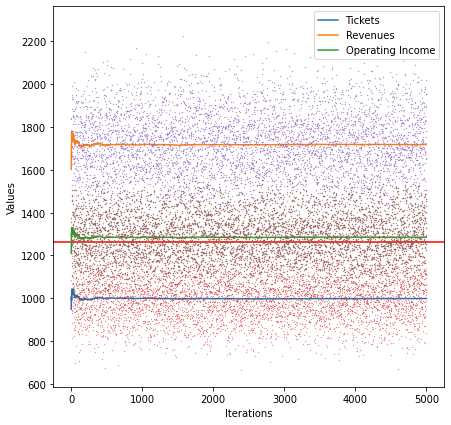

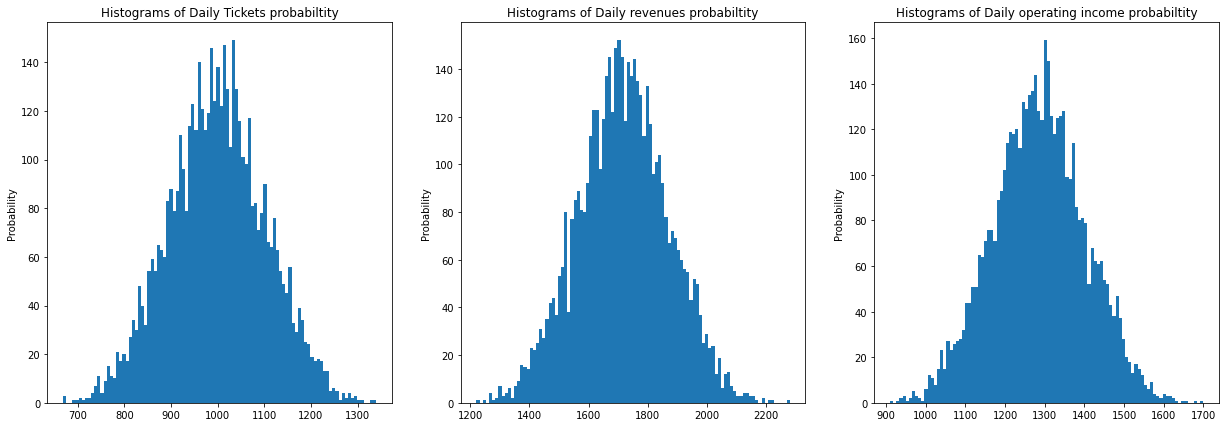

Investment      :  120000 €
Daily tickets   :  999.0 tickets
Revenues        :  532584.96 €
Operating Income:  398537.9 €
Fixed cost      :  374000 €
Net Income      :  24537.9 €
ROI             :  20.45 %


In [9]:
simulationsDays = 5000
openDays = 310
answer = monte_carlo(simulationsDays)


dailyTickets = answer[0]/simulationsDays
yearlyRevenues = answer[1]/simulationsDays*310
yearlyOperatingIncome = answer[2]/simulationsDays*310
yearlyNetIncome = yearlyOperatingIncome - fixedCosts
roi = yearlyNetIncome / investment * 100

print("Investment      : ", round(investment,2),            "€")
print("Daily tickets   : ", round(dailyTickets,0),          "tickets")
print("Revenues        : ", round(yearlyRevenues,2),        "€")
print("Operating Income: ", round(yearlyOperatingIncome,2), "€")
print("Fixed cost      : ", round(fixedCosts,2),            "€")
print("Net Income      : ", round(yearlyNetIncome,2),       "€")
print("ROI             : ", round(roi,2),                   "%")